# Assignment 5

In this assignment you will do sampling and quantization. 
You know from Signals and Systems and DSP courses that you cannot represent a continuous-time signal on a digital computer. Instead, you should sample in time to get a discrete-time signal.

Similarly, you cannot exactly represent the amplitude of a given sample on a digital computer, since you only have a limited number of bits for that representation. If we have $b+1$ bits in two's complement notation, you can only have $2^b$ possible values for the amplitude (since 1 bit will be assigned for the sign of the number). But if $b$ is large enough, or if you have a computer that has a floating-point implementation, the approximate value will most likely be good enough for general applications.

However, on a smaller, lower cost platform, such as a fixed-point DSP chip, you will limited to a much smaller set of possible amplitude values. This process of reducing an infinite set of values to a finite set is called quantization. 

If you want to learn more about signed-unsigned binary number, fixed point and floating point representations you can look at: https://www3.ntu.edu.sg/home/ehchua/programming/java/datarepresentation.html

You will do quantization in this assignment, to simplify process you will quantize signals in $-1$ and $1$ range. You will write two functions, first one is for quantizing and second one is for coding.
    
Suppose you have a sinusoidal signal $x(t)=sin(2\pi t)$ and you will convert it to a digital signal. There are basically three steps to accomplish this task: sampling $x(nT_s)=x[n]$, quantizing $Q_B[x]$ and coding. For this example, assume that $3$ bits will be used to represent values in the digital signal, therefore it means the quantization step $\Delta=2^{-b}=2^{-2}$, $N=2^2$:

 In the quantizer($x$,N,$\delta$, qtype) function, you will break the signal amplitudes according to the quantization step: 
1. Normalize the signal to fall into the range $(-1+\frac{\Delta}{2})<x[n]<(1-\frac{\Delta}{2})$.
    Hint : Remember if you're trying to put all data within a custom range where the lowest value is a and the highest value is b: xnormalized = a + ( ((x - xminimum) * (b - a)) / range of x)
    
2. Multiply the normalized signal by $N$ . 
   
3. If qtype='round' then round the sample values to the nearest integer. If qtype='truncate',then truncate the sample values to the nearest integer, otherwise give error. 
4. Divide by $N$.
    
In coding part, you will write a function that will take the quantized values of the signal and convert them to a binary number  for a digital system to store. Since you will have $3$ bits in two's complement format:

| Value | Code |
| :- | :-|
| $$0$$ | $$000$$ |
| $$0.25$$| $$001$$ |
| $$0.5$$ | $$010$$ |
| $$0.75$$ | $$011$$ |
| $$-0.25$$| $$111$$ |
| $$-0.5$$ | $$110$$ |
| $$-0.75$$ | $$101$$ |
| $$-1$$  | $$100$$ |


First write the quantizer and coder functions using the template given below. After that, using those functions, sample, quantize and code $x(t)=sin(2\pi t)$ and plot $x(t)$ (obviously it is not a continous time signal but we will pretend it as continous by selecting number of samples in one period), sampled signal $x[n]$ and $Q_B[x]$ which is quantized signal of $x(t)$ and finally the error signal $e[n]$. The error introduced by the quantization is given as:
$$e[n]= Q_B[x[n]]- x[n] $$

Remember we can select either rounding or truncation in the quantization process. So first do with rounding and then truncation. Plot the original signal and the quantized signal in the same plot for each case. Plot the error signal. Print the coded signal.  

To implement the operation functions, we need to use the following steps in order:

In the Quantizer() function, we first normalize the signal by scaling it to fit in the range (-1 + delta/2) < x[n] < (1 - delta/2).

We multiply the normalized signal by N to increase its resolution.

Depending on the qtype argument, we round or truncate sample values to the nearest integer.

We divide by N to bring the rounded or truncated values back to the original range.

In the coder() function, we convert quantized values to binary values using the two's complement format, with 3 bits per value.

We return the encoded signal as a list of binary numbers.

[ 0.    0.    0.    0.25  0.25  0.25  0.25  0.25  0.5   0.5   0.5   0.5
  0.5   0.75  0.75  0.75  0.75  0.75  0.75  0.75  0.75  0.75  0.75  0.75
  0.75  1.    0.75  0.75  0.75  0.75  0.75  0.75  0.75  0.75  0.75  0.75
  0.75  0.75  0.5   0.5   0.5   0.5   0.5   0.25  0.25  0.25  0.25  0.25
  0.    0.   -0.   -0.   -0.   -0.25 -0.25 -0.25 -0.25 -0.25 -0.5  -0.5
 -0.5  -0.5  -0.5  -0.75 -0.75 -0.75 -0.75 -0.75 -0.75 -0.75 -0.75 -0.75
 -0.75 -0.75 -0.75 -1.   -0.75 -0.75 -0.75 -0.75 -0.75 -0.75 -0.75 -0.75
 -0.75 -0.75 -0.75 -0.75 -0.5  -0.5  -0.5  -0.5  -0.5  -0.25 -0.25 -0.25
 -0.25 -0.25 -0.   -0.    0.    0.    0.    0.25  0.25  0.25  0.25  0.25
  0.5   0.5   0.5   0.5   0.5   0.75  0.75  0.75  0.75  0.75  0.75  0.75
  0.75  0.75  0.75  0.75  0.75  1.    0.75  0.75  0.75  0.75  0.75  0.75
  0.75  0.75  0.75  0.75  0.75  0.75  0.5   0.5   0.5   0.5   0.5   0.25
  0.25  0.25  0.25  0.25  0.    0.   -0.   -0.   -0.   -0.25 -0.25 -0.25
 -0.25 -0.25 -0.5  -0.5  -0.5  -0.5  -0.5  -0.75 -0.7

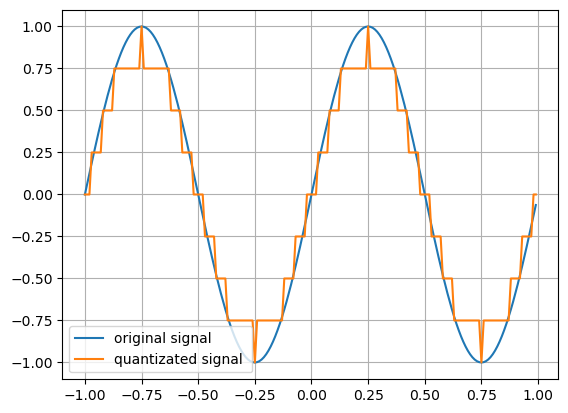

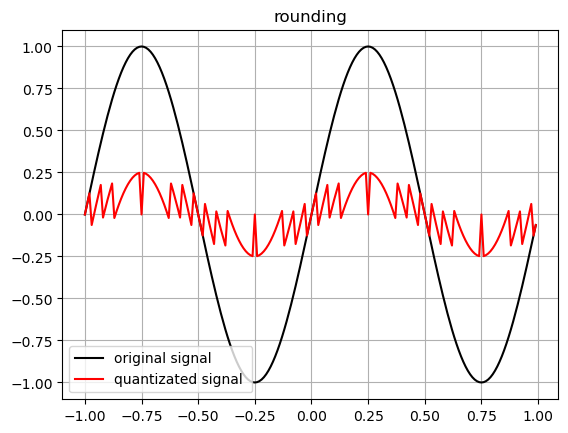

[ 0.    0.    0.    0.    0.    0.25  0.25  0.25  0.25  0.25  0.5   0.5
  0.5   0.5   0.5   0.5   0.5   0.75  0.75  0.75  0.75  0.75  0.75  0.75
  0.75  0.75  0.75  0.75  0.75  0.75  0.75  0.75  0.75  0.75  0.5   0.5
  0.5   0.5   0.5   0.5   0.5   0.25  0.25  0.25  0.25  0.25  0.    0.
  0.    0.   -0.   -0.   -0.   -0.   -0.   -0.25 -0.25 -0.25 -0.25 -0.25
 -0.5  -0.5  -0.5  -0.5  -0.5  -0.5  -0.5  -0.75 -0.75 -0.75 -0.75 -0.75
 -0.75 -0.75 -0.75 -0.75 -0.75 -0.75 -0.75 -0.75 -0.75 -0.75 -0.75 -0.75
 -0.5  -0.5  -0.5  -0.5  -0.5  -0.5  -0.5  -0.25 -0.25 -0.25 -0.25 -0.25
 -0.   -0.   -0.   -0.    0.    0.    0.    0.    0.    0.25  0.25  0.25
  0.25  0.25  0.5   0.5   0.5   0.5   0.5   0.5   0.5   0.75  0.75  0.75
  0.75  0.75  0.75  0.75  0.75  0.75  0.75  0.75  0.75  0.75  0.75  0.75
  0.75  0.75  0.5   0.5   0.5   0.5   0.5   0.5   0.5   0.25  0.25  0.25
  0.25  0.25  0.    0.    0.    0.   -0.   -0.   -0.   -0.   -0.   -0.25
 -0.25 -0.25 -0.25 -0.25 -0.5  -0.5  -0.5  -0.5  -0.5  

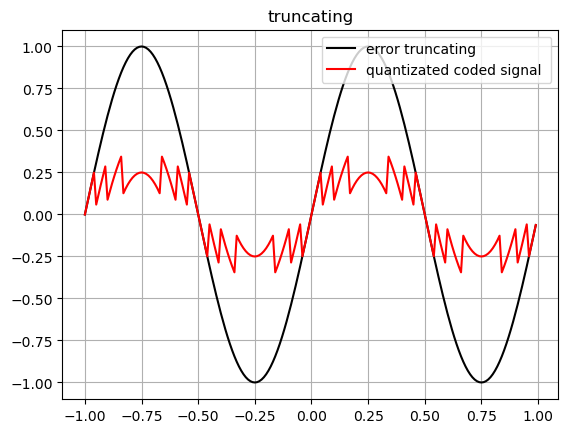

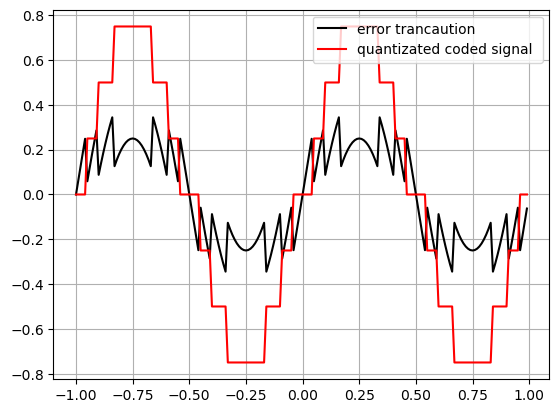

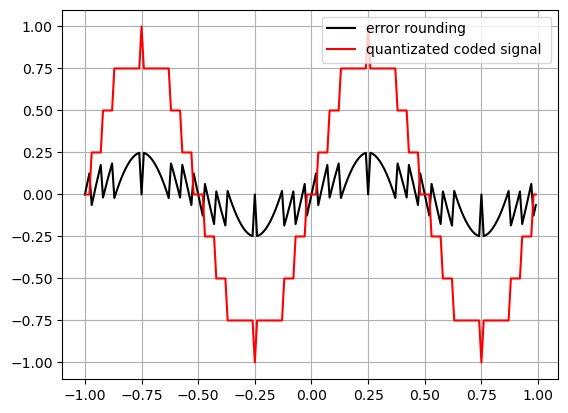

In [18]:
import numpy as np
import matplotlib.pyplot as plt

   
def quantizer(x, N, delta, qtype):
# normalize the signal   
        x_min = min(x)
        x_max = max(x)
        x_range = x_max - x_min
        x_normalized = -1 + delta/2 + ((x - x_min) * (1 - delta/2 - (-1 + delta/2))) / x_range
        
# multiply by N
        x_quantized = x_normalized *N
        x_quantization=[]
# round or truncate        
        if qtype == 'round':
             x_quantization=np.round(x_quantized)
        elif qtype == 'truncate':
            x_quantization=np.trunc(x_quantized)
            
# divide by N            
        x_quantization=x_quantization/N
       
    
        return x_quantization                
    


def coder(x_quantization):
    
    out_coder=[]
    
    print(x_quantization)
# Iterate over each quantized value    
    for x in x_quantization:
        if x == 0:
             out_coder.append("000")
        elif x == 0.25:
            out_coder.append("001")
        elif x == 0.5:
             out_coder.append("010")
        elif x == 0.75:
            out_coder.append("011")
        elif x == -0.25:
            out_coder.append("111")
        elif x == -0.5:
            out_coder.append("110")
        elif x == -0.75:
            out_coder.append("101")
        elif x == -1:
            out_coder.append("100")
            
            
    return out_coder
    
%matplotlib inline
n=np.arange(-1,1,0.01)
x=np.sin(np.pi*2*n)
q=quantizer(x, 4, 1/4, 'round')
k=coder(q)
print(k)
b=np.subtract(x,q)
plt.grid()
plt.plot(n,x)
plt.plot(n,q)
plt.legend(["original signal ", "quantizated signal "])
plt.show()

plt.grid()
plt.plot(n,x,'k')
plt.title('rounding')
plt.plot(n,b,'r')
plt.legend(["original signal ", "quantizated signal "])
plt.show()

L=quantizer(x, 4, 1/4, 'truncate')
k=coder(L)
print(k)
c=np.subtract(x,L)
plt.grid()
plt.plot(n,x,'k')
plt.title('truncating')
plt.plot(n,c,'r')
plt.legend(["error truncating ", "quantizated coded signal "])
plt.show()

plt.grid()
plt.plot(n,c,'k')
plt.plot(n,L,'r')
plt.legend(["error trancaution ", "quantizated coded signal "])
plt.show()

plt.grid()
plt.plot(n,b,'k')
plt.plot(n,q,'r')
plt.legend(["error rounding ", "quantizated coded signal "])
plt.show()

What are differences in error signals in rounding and truncation cases? Explain. 

Why are we normalizing the signal in the begining of the quantization process? Hint: Think overflow issues when adding or multiplying two numbers when they are integers and when they are all-fraction. Research on Two's Complement 1.15 (Q15) format.

What are differences in error signals in rounding and truncation cases? Explain.


In the case of rounding, an error signal is a numeric value that represents the difference between the original value and the rounded value. For example, if you round the number 4.6 to the nearest whole number, the error signal would be 0.6, since that is the difference between 4.6 and 5, the rounded value.

On the other hand, in the case of truncation, the error signal is the difference between the original value and the truncated value. For example, if you truncate the number 4.6 to the nearest whole number, the error signal would be 0.6, since that is the difference between 4.6 and 4, the truncated value.

In general, the error signal in rounding is always smaller than the error signal in truncation, because when you round a number, you always round it up or down to the nearest whole number, whereas when you truncate a number, you simply cut off the decimal part of the number, without regard for whether it is closer to the next whole number above or below. This means that in the case of rounding, the error signal is always less than or equal to 0.5, whereas in the case of truncation, the error signal can be any positive or negative value less than 1.

Why are we normalizing the signal in the begining of the quantization process? Hint: Think overflow issues when adding or multiplying two numbers when they are integers and when they are all-fraction. Research on Two's Complement 1.15 (Q15) format.

Normalizing a signal in the beginning of the quantization process is important because it ensures that the signal has a consistent range of values, which makes it easier to represent using a fixed-precision format such as Q15. This is especially important when working with integers, because if the range of values in the signal is too large, it can lead to overflow issues when adding or multiplying the numbers.

The Two's Complement Q15 format is a common fixed-point representation that is used in many digital signal processing applications. In this format, each number is represented using 16 bits, with the most significant bit (MSB) representing the sign of the number and the remaining 15 bits representing the magnitude of the number. The range of values that can be represented using this format is from -32768 to 32767, which means that any signal that is normalized to this range can be represented using this format without overflow issues.

In general, normalizing a signal before quantizing it is important because it helps to avoid overflow issues, and it also ensures that the signal can be represented accurately using the chosen fixed-point format. It is also important because it allows for a more efficient use of the available bits in the fixed-point representation, which can help to improve the overall accuracy of the quantized signal.
